# Netflix Movies and TV Shows

## About this Dataset: 
  Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

## Interesting Task Ideas
1.Understanding what content is available in different countries

2.Identifying similar content by matching text-based features

3.Network analysis of Actors / Directors and find interesting insights

4.Does Netflix has more focus on TV Shows than movies in recent years.

In [1]:
# import librarys
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# import data set
df = pd.read_csv(r"D:\model\netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
#  cheak null values
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# cheak duplicate values
df.duplicated().sum()

np.int64(0)

In [7]:
df['show_id'].value_counts().sum()

np.int64(8807)

In [8]:
df.set_index('show_id',inplace=True)

In [9]:
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# Replace the missing values
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].replace(np.nan, "Unknown ")

In [11]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.isna().sum()

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [13]:
# drop the null values
df.dropna(subset=['rating','duration','date_added'],inplace =True) 

In [14]:
df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
df['date_added']=df['date_added'].astype('datetime64[ms]')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      8790 non-null   object        
 3   cast          8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ms]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ms](1), int64(1), object(9)
memory usage: 824.1+ KB


In [17]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
df['loading_Year'] = df ['date_added'].dt.year
df['loading_Year'] 

show_id
s1       2021
s2       2021
s3       2021
s4       2021
s5       2021
         ... 
s8803    2019
s8804    2019
s8805    2019
s8806    2020
s8807    2019
Name: loading_Year, Length: 8790, dtype: int32

In [19]:
df['loading_Month']= df ['date_added'].dt.month_name()
df['loading_Month']

show_id
s1       September
s2       September
s3       September
s4       September
s5       September
           ...    
s8803     November
s8804         July
s8805     November
s8806      January
s8807        March
Name: loading_Month, Length: 8790, dtype: object

Data Analysis and visulactions


In [21]:
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [22]:
df[['loading_Year','release_year']]

,loading_Year,release_year
show_id,,
s1,2021,2020
s2,2021,2021
s3,2021,2021
s4,2021,2021
s5,2021,2021
...,...,...
s8803,2019,2007
s8804,2019,2018
s8805,2019,2009


<Axes: xlabel='loading_Year', ylabel='Count'>

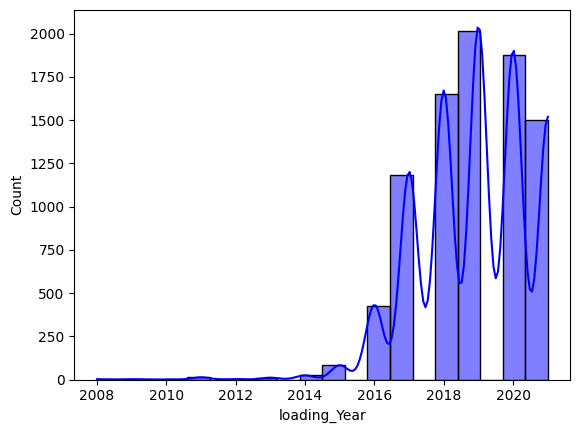

In [23]:
sns.histplot(data=df, x='loading_Year', bins=20, kde=True, color='blue')

<Axes: xlabel='type'>

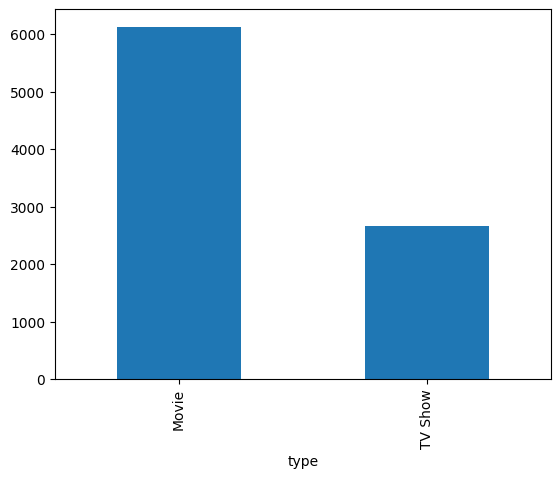

In [24]:
df['type'].value_counts().plot(kind='bar')

In [25]:
df['director'].value_counts().iloc[1:11]

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: count, dtype: int64

<Axes: xlabel='director'>

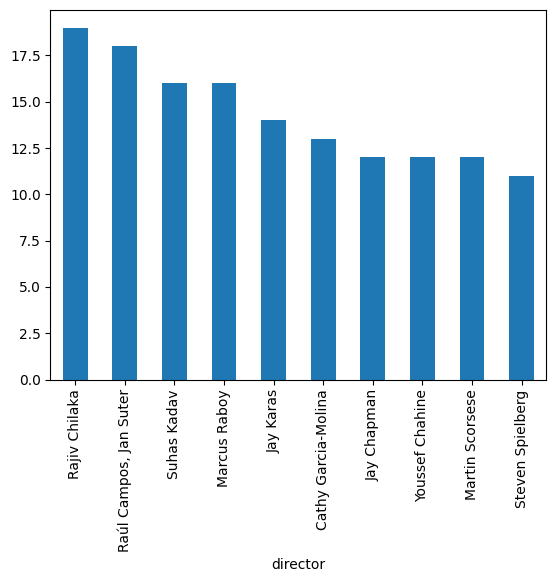

In [26]:
df['director'].value_counts().iloc[1:11].plot(kind='bar')

In [28]:
df[ (df['type']=='Movie')&(df['director']=='David Fincher') &(df['country']=="United States")]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,loading_Year,loading_Month
show_id,,,,,,,,,,,,,
s601,Movie,The Game,David Fincher,"Michael Douglas, Sean Penn, Deborah Kara Unger...",United States,2021-07-01,1997,R,129 min,Thrillers,An aloof investment banker's life spirals into...,2021,July
s1596,Movie,MANK,David Fincher,"Gary Oldman, Amanda Seyfried, Charles Dance, L...",United States,2020-12-04,2020,R,133 min,"Dramas, Independent Movies",1930s Hollywood is reevaluated through the eye...,2020,December
s7702,Movie,Panic Room,David Fincher,"Jodie Foster, Forest Whitaker, Dwight Yoakam, ...",United States,2019-08-01,2002,R,112 min,Thrillers,A woman and her daughter are caught in a game ...,2019,August
s8512,Movie,The Social Network,David Fincher,"Jesse Eisenberg, Andrew Garfield, Justin Timbe...",United States,2020-04-01,2010,PG-13,121 min,Dramas,Director David Fincher's biographical drama ch...,2020,April
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,November


In [29]:
df[ (df['type']=='Movie')&(df['director']=='Youssef Chahine') &(df['country']=="Egypt")]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,loading_Year,loading_Month
show_id,,,,,,,,,,,,,
s530,Movie,Return of the Prodigal Son,Youssef Chahine,"Majida El Roumi, Souheir El Morshidy, Shoukry ...",Egypt,2021-07-06,1976,TV-MA,124 min,"Dramas, International Movies","Freed after spending 12 years in jail, a man's...",2021,July
s2368,Movie,An Egyptian Story,Youssef Chahine,"Nour El-Sherif, Magda El-Khatib, Yousra, Mohse...",Egypt,2020-06-18,1982,TV-MA,129 min,"Classic Movies, Dramas, Independent Movies","While undergoing heart surgery in London, Yehi...",2020,June
s2369,Movie,Cairo Station,Youssef Chahine,"Farid Shawqy, Hind Rostom, Youssef Chahine, Ha...",Egypt,2020-06-18,1958,TV-14,73 min,"Classic Movies, Dramas, International Movies",A Cairo newsstand vendor's fantasies morph int...,2020,June
s2370,Movie,Dark Waters,Youssef Chahine,"Faten Hamama, Omar Sharif, Ahmed Ramzy, Hussei...",Egypt,2020-06-18,1956,TV-14,104 min,"Classic Movies, Dramas, International Movies",A fisherman returns home after a three-year ab...,2020,June
s2374,Movie,Saladin,Youssef Chahine,"Ahmad Mazhar, Salah Zo El Faqqar, Nadia Lotfi,...",Egypt,2020-06-18,1963,TV-MA,194 min,"Action & Adventure, Classic Movies, Dramas",The Sultan of Egypt and Syria launches a campa...,2020,June
s2376,Movie,The Blazing Sun,Youssef Chahine,"Omar Sharif, Faten Hamama, Zaki Rostom, Farid ...",Egypt,2020-06-18,1954,TV-14,116 min,"Classic Movies, Dramas, International Movies",Competition between sugar cane producers turns...,2020,June
s2377,Movie,The Land,Youssef Chahine,"Hamdy Ahmed, Nagwa Ibrahim, Ezzat El Alaili, T...",Egypt,2020-06-18,1970,TV-MA,130 min,"Classic Movies, Dramas, International Movies",A group of peasant farmers fights to protect t...,2020,June


In [30]:
df['country'].value_counts()

country
United States                                             2809
India                                                      972
Unknown                                                    829
United Kingdom                                             418
Japan                                                      243
                                                          ... 
Germany, Canada, United States                               1
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Serbia, South Korea, Slovenia                                1
United Kingdom, Spain, Belgium                               1
South Africa, United States, Japan                           1
Name: count, Length: 749, dtype: int64

C:\Users\Arunk\AppData\Local\Temp\ipykernel_25944\3014386243.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_temp, palette='viridis')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '1925'),
  Text(1, 0, '1942'),
  Text(2, 0, '1943'),
  Text(3, 0, '1944'),
  Text(4, 0, '1945'),
  Text(5, 0, '1946'),
  Text(6, 0, '1947'),
  Text(7, 0, '1954'),
  Text(8, 0, '1955'),
  Text(9, 0, '1956'),
  Text(10, 0, '1958'),
  Text(11, 0, '1959'),
  Text(12, 0, '1960'),
  Text(13, 0, '1961'),
  Text(14, 0, '1962'),
  Text(15, 0, '1963'),
  Text(16, 0, '1964'),
  Text(17, 0, '1965'),
  Text(18, 0, '1966'),
  Text(19, 0, '1967'),
  Text(20, 0, '1968'),
  Text(21, 0, '1969'),
  Text(22, 0, '1970'),
  Text(23, 0, '1971'),
  Text(24, 0, '1972'),
  Text(25, 0, '1973'),
  Text(26, 0, '1974'),
  Text(27, 0, '1975'),
  Text(28, 0, '1976'),
  Text(29, 0, '1977')])

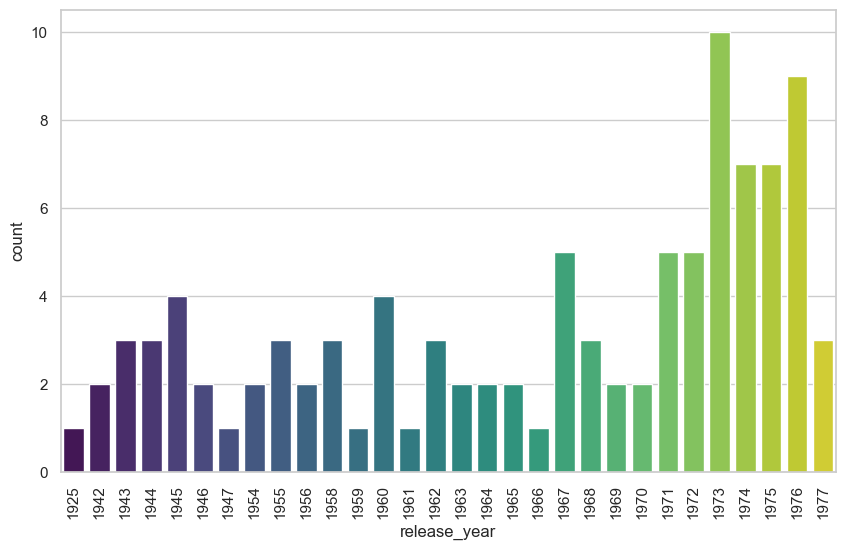

In [31]:
df_temp=df['release_year'].sort_values().head(100)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x=df_temp, palette='viridis')
plt.xticks(rotation=90)

In [32]:
df[(df['type']=='Movie' )& (df['release_year']==2000)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,loading_Year,loading_Month
show_id,,,,,,,,,,,,,
s181,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",Unknown,2021-09-01,2000,PG-13,107 min,"Comedies, Romantic Movies","After getting engaged, Sherman Klump prepares ...",2021,September
s351,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,2021-08-01,2000,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",A retired engineer agrees to help NASA prevent...,2021,August
s360,Movie,The Original Kings of Comedy,Spike Lee,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",United States,2021-08-01,2000,R,111 min,Stand-Up Comedy,"Comedians Steve Harvey, Cedric the Entertainer...",2021,August
s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany",2021-07-01,2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...,2021,July
s594,Movie,Snow Day,Chris Koch,"Chris Elliott, Mark Webber, Jean Smart, Schuyl...",United States,2021-07-01,2000,PG,89 min,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the...",2021,July
s780,Movie,Battlefield Earth,Roger Christian,"John Travolta, Barry Pepper, Forest Whitaker, ...",United States,2021-06-02,2000,PG-13,118 min,"Action & Adventure, Cult Movies, Sci-Fi & Fantasy","In the year 3000, an alien race known as the P...",2021,June
s953,Movie,The Whole Nine Yards,Jonathan Lynn,"Bruce Willis, Matthew Perry, Rosanna Arquette,...",United States,2021-05-01,2000,R,99 min,"Action & Adventure, Comedies",An unhappily married dentist becomes mixed up ...,2021,May
s3473,Movie,Rugrats in Paris: The Movie,"Stig Bergqvist, Paul Demeyer","Elizabeth Daily, Tara Strong, Cheryl Chase, Ch...","Germany, United States",2019-10-01,2000,G,79 min,"Children & Family Movies, Comedies",The Rugrats take to the big screen and visit P...,2019,October
s4546,Movie,Monty Python: Before the Flying Circus,Will Yapp,"Graham Chapman, Eric Idle, Terry Jones, Michae...",United Kingdom,2018-10-02,2000,TV-MA,56 min,"Comedies, Documentaries",Discover how six seemingly ordinary but suprem...,2018,October


In [33]:
df[(df['type']=='TV Show')&(df['country']=='Egypt') ]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,loading_Year,loading_Month
show_id,,,,,,,,,,,,,
s1202,TV Show,Abla Fahita: Drama Queen,Unknown,"Bassem Samra, Donia Maher, Zeina Mansour, Osam...",Egypt,2021-03-15,2021,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Com...","Falsely incriminated, Abla Fahita is separated...",2021,March
s1230,TV Show,My Way,Unknown,"Sherine, Ahmed Fahmi, Bassel Khaiat, Sawsan Ba...",Egypt,2021-03-06,2015,TV-14,1 Season,"International TV Shows, TV Dramas","In the 1970s, an aspiring singer struggles to ...",2021,March
s1571,TV Show,Once Upon a Time,Unknown,"Ruby, Mohamed Farraag, Ahmed Dawood, Sawsan Ba...",Egypt,2020-12-09,2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Fighting to save his ancestors' mansion from d...,2020,December
s1659,TV Show,Valentino,Unknown,"Adel Imam, Dalal Abdelaziz, Hamdy Al-Merghany,...",Egypt,2020-11-24,2020,TV-14,1 Season,"International TV Shows, TV Comedies, TV Dramas",As the owner of a group of international schoo...,2020,November
s1738,TV Show,Paranormal,Unknown,"Ahmed Amin, Razane Jammal, Ayah Samaha, Samaa ...",Egypt,2020-11-05,2020,TV-14,1 Season,"International TV Shows, TV Dramas, TV Horror",After a skeptical hematologist is plunged into...,2020,November
s4023,TV Show,More to Say,Unknown,"Yousra, Naglaa Badr, Sherine Reda, Ahmed Hatem...",Egypt,2019-03-13,2018,TV-14,1 Season,"International TV Shows, TV Dramas, TV Mysteries","After her son dies in an accident, a legal con...",2019,March
s4024,TV Show,The Land of Hypocrisy,Unknown,"Mohamed Henedy, Dalal Abdel Aziz, Hana Shiha, ...",Egypt,2019-03-13,2018,TV-14,1 Season,"International TV Shows, TV Comedies, TV Sci-Fi...",A hardworking man in a thankless job meets a m...,2019,March
s4027,TV Show,Eugenie Nights,Unknown,"Ameena Khalil, Zafer Abdeen, Injy El Mokkaddem...",Egypt,2019-03-11,2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","In 1940s Port Said, Kariman finds comfort and ...",2019,March
s4028,TV Show,This Evening,Unknown,"Eyad Nassar, Ahmed Dawood, Mohamed Farraag, Ha...",Egypt,2019-03-11,2017,TV-14,1 Season,"International TV Shows, TV Dramas",The lives of a wealthy couple hiding their mar...,2019,March


In [34]:
df[(df['type']=='TV Show')&(df['country']=='India') ]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,loading_Year,loading_Month
show_id,,,,,,,,,,,,,
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September
s40,TV Show,Chhota Bheem,Unknown,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021,September
s51,TV Show,Dharmakshetra,Unknown,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,2021-09-15,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",2021,September
s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,Unknown,Unknown,India,2021-09-15,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,2021,September
s70,TV Show,Stories by Rabindranath Tagore,Unknown,Unknown,India,2021-09-15,2015,TV-PG,1 Season,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...,2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8174,TV Show,Thackeray,Unknown,Unknown,India,2019-05-25,2019,TV-MA,1 Season,TV Shows,From controversial cartoonist to powerful Mumb...,2019,May
s8236,TV Show,The Calling,Bumpy,Unknown,India,2019-04-01,2018,TV-MA,1 Season,"International TV Shows, Reality TV",Food-crazed travel junkies journey across Indi...,2019,April
s8322,TV Show,The Golden Years with Javed Akhtar,Unknown,Unknown,India,2017-06-01,2016,TV-G,1 Season,"Docuseries, International TV Shows","Writer, poet and lyricist Javed Akhtar hosts t...",2017,June


In [35]:
df[df['type']=='TV Show']['country'].value_counts().head(10)

country
United States     754
Unknown           390
United Kingdom    212
Japan             167
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Name: count, dtype: int64

<Axes: xlabel='country'>

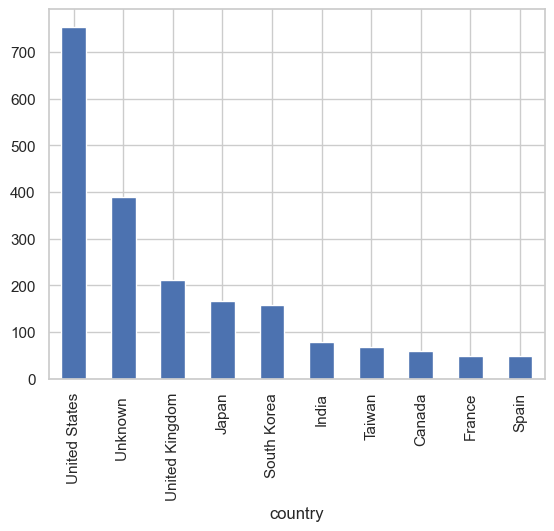

In [36]:
df[df['type']=='TV Show']['country'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='country'>

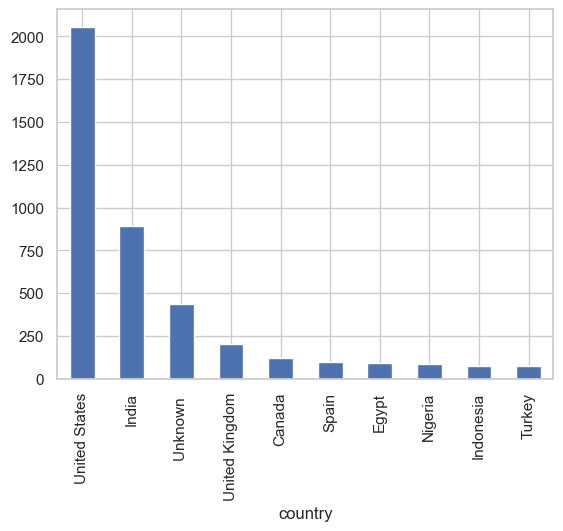

In [37]:
df[df['type']=='Movie']['country'].value_counts().head(10).plot(kind='bar')

In [38]:
df[(df['type']=='Movie')&(df['listed_in']=='Comedies')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,loading_Year,loading_Month
show_id,,,,,,,,,,,,,
s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021,September
s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,2021-09-01,2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...,2021,September
s183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,2021-09-01,2008,PG-13,114 min,Comedies,R.J. travels to Georgia for his parents' 50th ...,2021,September
s343,Movie,Major Payne,Nick Castle,"Damon Wayans, Karyn Parsons, William Hickey, M...",United States,2021-08-01,1995,PG-13,97 min,Comedies,A hardened Marine is given his marching orders...,2021,August
s349,Movie,Poms,Zara Hayes,"Diane Keaton, Jacki Weaver, Pam Grier, Rhea Pe...","United Kingdom, United States",2021-08-01,2019,PG-13,91 min,Comedies,"After moving to a retirement community, loner ...",2021,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8421,Movie,The Men Who Stare at Goats,Grant Heslov,"George Clooney, Ewan McGregor, Jeff Bridges, K...","United States, United Kingdom",2019-06-04,2009,R,94 min,Comedies,A journalist latches onto an unbelievable stor...,2019,June
s8434,Movie,The Naked Gun 2 1/2: The Smell of Fear,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",Unknown,2020-01-01,1991,PG-13,85 min,Comedies,Bumbling cop Frank Drebin is out to foil the b...,2020,January
s8537,Movie,The Trip to Spain,Michael Winterbottom,"Steve Coogan, Rob Brydon, Marta Barrio, Claire...",United Kingdom,2017-12-12,2016,TV-MA,108 min,Comedies,Comedians Steve Coogan and Rob Brydon gorge on...,2017,December


In [39]:
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,loading_Year,loading_Month
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September


In [40]:
df['listed_in'].value_counts()

listed_in
Dramas, International Movies                                  362
Documentaries                                                 359
Stand-Up Comedy                                               334
Comedies, Dramas, International Movies                        274
Dramas, Independent Movies, International Movies              252
                                                             ... 
Dramas, Horror Movies, Sci-Fi & Fantasy                         1
British TV Shows, TV Dramas, TV Sci-Fi & Fantasy                1
Comedies, Cult Movies, Sports Movies                            1
Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy      1
Cult Movies, Dramas, Thrillers                                  1
Name: count, Length: 513, dtype: int64

# conclusion

* Around 70% content on Netflix is Movies and around 30% content is TV shows.

* The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014.

* Year 2015 marks the drastic surge in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies.

* Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly. Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.

* Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.

* The release year for shows is concentrated in the range 2005-2021.

* Shorter duration movies have been popular in last 10 years